<h1><center>PHYS-F-303: Partie Numérique</center></h1>
<h1><center>Calcul détaillé des propriétés physiques pour le modèle d'Ising</center></h1>
<h2><center>Cédric SCHOONEN, Maxime JAMOTTE</center></h2>

## Etude de l'évolution du $\alpha$ critique avec la taille de la grille

In [1]:
import time,pandas
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML

### Calcul des paramètres (Magnétisation, Energie, Capacité calorifique)en fonction de $\alpha$ pour différentes tailles de grille

Commençons par importer les fonctions nécessaires, définies dans un fichier séparé.

In [2]:
import Ising_capacalo_jit as Ising

L'initialisation des paramètres de la simulation se fait ici:

In [6]:
NMC = 100+7000 # M et E calculées sur NMC-NMC_eq itérations
NMC_eq = 100
alphas = np.concatenate((np.arange(0,0.34,0.02) , np.arange(0.34,0.41,0.005), np.arange(0.41,0.425,0.001) , \
                         np.arange(0.425,0.445,0.0003), np.arange(0.435,0.45,0.001), np.arange(0.45,0.56,0.005), \
                         np.arange(0.56,1,0.02)))

alphasAbove043 = alphas[np.where(alphas>=0.43)]
resolution = 1/(alphasAbove043[1]-alphasAbove043[0])

np.random.shuffle(alphas) # pour avoir des données utilisables en cours de simulation
a = len(alphas)
    
# Affichage des paramètres choisis
print("Number of alphas: {:d}".format(a))
print("NMC per alpha: {:d}".format(NMC-NMC_eq))
print("Resolution close to the transition: 1/{:.3f}".format(resolution))
    
# Estimation du temps de calcul. Estimation propre à une machine particuliere. Pour estimer le temps de calcul sur 
# votre machine, lancer le calcul de la cellule suivante pour un petit nombre d'itération et modifier ce qui suit.
print("Estimated computation time for a 20x20 grid: {:.2f} hours".format(NMC/20000*a/92*1.00))

Number of alphas: 175
NMC per alpha: 70
Resolution close to the transition: 1/3333.333
Estimated computation time for a 20x20 grid: 0.02 hours


Décommenter et exécuter la cellule suivante lance le calcul complet:

In [7]:
for i in range(4):
    
    nx = 20*(i+1)
    ny = 20*(i+1)
    print("Grid size: {:d}x{:d}".format(nx,ny))
    
    sps = np.empty([a,nx,ny])
    for i in range(a):
        sps[i] = Ising.initial_state_aligned(nx,ny)
    
    start = time.time()
    [Ms,Es,VarEs] = Ising.M_equilibrium_for_alphas(
        sps,nx,ny,NMC,step,alphas,NMC_eq,"dataIsing/new-dataIsing-Res=3333-NMC=7000-N={:d}.csv".format(nx))
    stop = time.time()
    print(stop-start)

Grid size: 20x20
loop 0 of 175, at alpha = 0.440
loop 1 of 175, at alpha = 0.439
loop 2 of 175, at alpha = 0.680
loop 3 of 175, at alpha = 0.413
loop 4 of 175, at alpha = 0.435
loop 5 of 175, at alpha = 0.432
loop 6 of 175, at alpha = 0.535
loop 7 of 175, at alpha = 0.446
loop 8 of 175, at alpha = 0.505
loop 9 of 175, at alpha = 0.441
loop 10 of 175, at alpha = 0.420
loop 11 of 175, at alpha = 0.340
loop 12 of 175, at alpha = 0.442
loop 13 of 175, at alpha = 0.180
loop 14 of 175, at alpha = 0.441
loop 15 of 175, at alpha = 0.780
loop 16 of 175, at alpha = 0.434
loop 17 of 175, at alpha = 0.385
loop 18 of 175, at alpha = 0.240
loop 19 of 175, at alpha = 0.740
loop 20 of 175, at alpha = 0.414
loop 21 of 175, at alpha = 0.440
loop 22 of 175, at alpha = 0.495
loop 23 of 175, at alpha = 0.300
loop 24 of 175, at alpha = 0.120
loop 25 of 175, at alpha = 0.555
loop 26 of 175, at alpha = 0.429
loop 27 of 175, at alpha = 0.445
loop 28 of 175, at alpha = 0.438
loop 29 of 175, at alpha = 0.427
loo

loop 71 of 175, at alpha = 0.426
loop 72 of 175, at alpha = 0.444
loop 73 of 175, at alpha = 0.160
loop 74 of 175, at alpha = 0.432
loop 75 of 175, at alpha = 0.419
loop 76 of 175, at alpha = 0.449
loop 77 of 175, at alpha = 0.430
loop 78 of 175, at alpha = 0.434
loop 79 of 175, at alpha = 0.427
loop 80 of 175, at alpha = 0.760
loop 81 of 175, at alpha = 0.441
loop 82 of 175, at alpha = 0.443
loop 83 of 175, at alpha = 0.443
loop 84 of 175, at alpha = 0.445
loop 85 of 175, at alpha = 0.660
loop 86 of 175, at alpha = 0.470
loop 87 of 175, at alpha = 0.410
loop 88 of 175, at alpha = 0.515
loop 89 of 175, at alpha = 0.442
loop 90 of 175, at alpha = 0.345
loop 91 of 175, at alpha = 0.480
loop 92 of 175, at alpha = 0.820
loop 93 of 175, at alpha = 0.060
loop 94 of 175, at alpha = 0.444
loop 95 of 175, at alpha = 0.429
loop 96 of 175, at alpha = 0.455
loop 97 of 175, at alpha = 0.429
loop 98 of 175, at alpha = 0.960
loop 99 of 175, at alpha = 0.424
loop 100 of 175, at alpha = 0.370
loop 101 

KeyboardInterrupt: 

### Fit des données et recherche du maximum

Cherchons à la main les paramètres qui définissent une parabole proches du sommet de la courbe sous la forme 

$$ y = A(x-X_0)^2+C $$

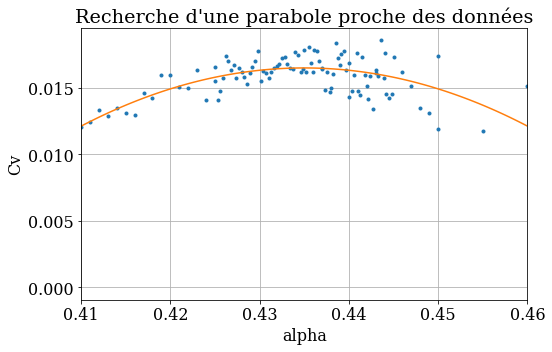

-7 0.435 0.0165


In [7]:
A = -7
X0 = 0.435
C = 0.0165

x = np.linspace(0.41,0.46,100)
y = A*(x-X0)**2+C

plt.figure(figsize=(8,5));
plt.plot(alphas,Cvs, '.');
plt.plot(x,y, '-');
plt.title("Recherche d'une parabole proche des données".format(nx,ny));
plt.xlabel('alpha');
plt.ylabel('Cv');
plt.xlim([0.41,0.46]);
plt.grid();
plt.show()

print(A,X0,C)

Maintenant que nous savons parmi quels coefficients chercher, nous pouvons automatiser le processus avec une fonction cherchant le meilleur fit par moindres carrés. Dans les cellules qui suivent, nous appelons pour chaque grille une fonction qui réalise l'analyse par moindre carré du sommet de la courbe afin de trouver le $\alpha$ critique.

Cette fonction affiche aussi les paramètres fittant le mieux chaque ensemble de données, ce qui nous permet d'affiner l'ensemble de paramètres test original utilisé. 

La fonction calcule l'erreur sur ce qu'elle renvoie en répétant plusieurs fois le calcul sur les données bruitée avec un bruit d'amplitude plausible, i.e. semblable à la variance des données et en regardant la variance des résultats (erreur statistique), ainsi qu'en tenant compte de la résolution utilisée dans les paramètres test (erreur numérique).

Les paramètres test sont bien choisi si l'erreur numérique liée à la finesse de l'échantillonage est petite comparée à l'erreur statistique sur les données récoltées. Ainsi, nous en arrivons à utiliser les paramètres test implémentés dans cette fonction.

Importons la procédure de calcul du alpha critique par la méthode des moindres carrés appliqué à un fit parabolique du sommet de la courbe de la capacité calorifique.

In [8]:
import Least_Squares

Appliquons-la à nos données pour trouver le alpha maximisant la capacité calorifique pour chaque grille de spin étudiée.

In [9]:
nbfichiers = 10

alphas_max = np.empty(nbfichiers)
err_alphas_max = np.empty(nbfichiers)

for i in range(nbfichiers):
    
    print("Run {:d}".format(i))
    [alphas_max[i], err_alphas_max[i]] = \
        Least_Squares.moindres_carres_avec_erreur("dataIsing/dataIsing-Res=3333-NMC=7000-Run={:d}.csv".format(i))


Run 0
Best fitting parameters: -9.0000 0.4333 0.0166
Le maximum de la parabole de fit se trouve en alpha = 0.43330 +- 0.00015
Erreur numérique: 0.00005 - Erreur Statistique: 0.00014
--------------------------------------------------------------------
Run 1
Best fitting parameters: -7.0000 0.4361 0.0164
Le maximum de la parabole de fit se trouve en alpha = 0.43615 +- 0.00015
Erreur numérique: 0.00005 - Erreur Statistique: 0.00014
--------------------------------------------------------------------
Run 2
Best fitting parameters: -9.0000 0.4330 0.0165
Le maximum de la parabole de fit se trouve en alpha = 0.43295 +- 0.00011
Erreur numérique: 0.00005 - Erreur Statistique: 0.00010
--------------------------------------------------------------------
Run 3
Best fitting parameters: -8.0000 0.4340 0.0165
Le maximum de la parabole de fit se trouve en alpha = 0.43395 +- 0.00015
Erreur numérique: 0.00005 - Erreur Statistique: 0.00015
-----------------------------------------------------------------

Nous voyons que les différentes grilles ne donnent pas les mêmes résultats pour le $\alpha$ critique. Ceux-ci ne rentrent pas dans les intervalles de confiance de leurs voisins. Cela signifie que l'évolution des spins observée dépend fortement de l'état initial de la grille. Selons nous, les spins sont trop fortement corrélés pour que les résultats obtenus en appliquant autant de fois l'algorithme de Metropolis soient assez représentatifs de l'ensemble des états accesibles aux spins par des fluctuations thermique. 

Nous allons donc retenir comme valeur de $\alpha$ critique la moyenne de ces valeurs et estimer l'erreur sur cette moyenne avec la variance des résultats obtenus en faisant varier la grille.

In [10]:
alpha_critique = np.sum(alphas_max)/len(alphas_max)
err_alpha_critique = np.std(alphas_max)

print("Le alpha critique retenu est {:.4f} +- {:.4f}".format(alpha_critique,err_alpha_critique))

Le alpha critique retenu est 0.4336 +- 0.0010
